<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/wheat_chess_board_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Sample code]

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [2]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


[Problem 1]

In [4]:
small_board_ndarray = np.reshape(small_board_ndarray, (-1,2))
print (small_board_ndarray)

[[1 2]
 [4 8]]


[Problem 2]

In [23]:
def generate_wheat_chess_board(n, m):
  array = np.ndarray((n,m))
  wheat = 1
  for x in range(array.shape[0]):
    for y in range(array.shape[1]):
      if (x == 0 and y == 0):
        array[x][y]=wheat
      else:
        wheat = 2*wheat
        array[x][y] = wheat
  return array

print ("4x4 chess board:\n{}".format(generate_wheat_chess_board(4,4).astype(int)))
print ("8x8 chess board:\n{}".format(generate_wheat_chess_board(8,8).astype(int)))

4x4 chess board:
[[    1     2     4     8]
 [   16    32    64   128]
 [  256   512  1024  2048]
 [ 4096  8192 16384 32768]]
8x8 chess board:
[[                   1                    2                    4
                     8                   16                   32
                    64                  128]
 [                 256                  512                 1024
                  2048                 4096                 8192
                 16384                32768]
 [               65536               131072               262144
                524288              1048576              2097152
               4194304              8388608]
 [            16777216             33554432             67108864
             134217728            268435456            536870912
            1073741824           2147483648]
 [          4294967296           8589934592          17179869184
           34359738368          68719476736         137438953472
          274877906944     

[Problem 3]

Total number of wheat on 8x8 chess board: 1.8446744073709552e+19
Average number of wheat on each column 8x8 chess board: [   9042521604759584   18085043209519168   36170086419038336
   72340172838076672  144680345676153344  289360691352306688
  578721382704613376 1157442765409226752]



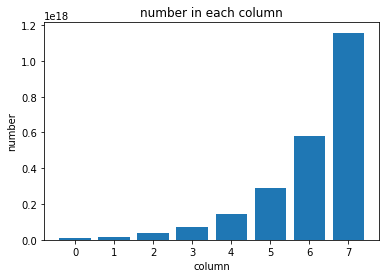

In [33]:
chessArray = generate_wheat_chess_board(8,8)
sum = np.sum(chessArray)
avg_column = np.average(chessArray, axis=0).astype(int)

print ("Total number of wheat on 8x8 chess board: {}".format(sum))
print ("Average number of wheat on each column 8x8 chess board: {}".format(avg_column))

import matplotlib.pyplot as plt
%matplotlib inline

print ()

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(range(0, avg_column.shape[0]), avg_column)
plt.show()

[Problem 4]

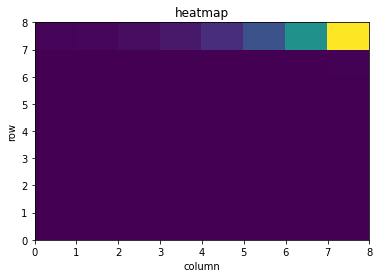

In [39]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chessArray)
plt.show()

[Problem 5]

In [42]:
first_half = np.sum(chessArray[0:3,:])
second_half = np.sum(chessArray[4:7,:])
print ("Number of wheat on first half:{}".format(first_half))
print ("Number of wheat on second half:{}".format(second_half))
print ("Number of times of second half is greater than first half: {}".format(second_half/first_half))

Number of wheat on first half:16777215.0
Number of wheat on second half:7.205758974296064e+16
Number of times of second half is greater than first half: 4294967296.0


[Problem 6, 7]

In [59]:
%%timeit
def generate_ndarray (n , m):
  board_ndarray = np.array([1])
  for _ in range(n*m - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
  board_ndarray = np.reshape(board_ndarray, (-1,n)).astype(np.uint64)
  return board_ndarray

print("8x8（ndarray）：{}".format(generate_ndarray(8,8)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


Streaming output truncated to the last 5000 lines.
       70368744177664     140737488355328]
 [    281474976710656     562949953421312    1125899906842624
     2251799813685248    4503599627370496    9007199254740992
    18014398509481984   36028797018963968]
 [  72057594037927936  144115188075855872  288230376151711744
   576460752303423488 1152921504606846976 2305843009213693952
  4611686018427387904 9223372036854775808]]
8x8（ndarray）：[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            6710

In [60]:
%%timeit
def generate_broadcast (n, m):
  indices_of_squares = np.arange(n*m).astype(np.uint64)
  board_ndarray = 2**indices_of_squares
  board_ndarray = np.reshape(board_ndarray, (-1,n))
  return board_ndarray

print("8x8（broadcast）：{}".format(generate_broadcast(8,8)))

Streaming output truncated to the last 5000 lines.
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328]
 [    281474976710656     562949953421312    1125899906842624
     2251799813685248    4503599627370496    9007199254740992
    18014398509481984   36028797018963968]
 [  72057594037927936  144115188075855872  288230376151711744
   576460752303423488 1152921504606846976 2305843009213693952
  4611686018427387904 9223372036854775808]]
8x8（broadcast）：[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             83

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328]
 [    281474976710656     562949953421312    1125899906842624
     2251799813685248    4503599627370496    9007199254740992
    18014398509481984   36028797018963968]
 [  72057594037927936  144115188075855872  288230376151711744
   576460752303423488 1152921504606846976 2305843009213693952
  4611686018427387904 9223372036854775808]]
8x8（broadcast）：[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             83

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

